## Data Section

In [26]:
import pandas as pd
import numpy as np

In [27]:
# Read crime records data into dataftrame
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201807,201808,201809,201810,201811,201812,201901,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,7,8,13,3,14,5,6,12,12,7


In [28]:
# lets check the shape of the data
crime.shape

(1569, 27)

In [29]:
crime.rename(columns={"LookUp_BoroughName": "Borough"}, inplace = True)
crime.head()

,MajorText,MinorText,Borough,201807,201808,201809,201810,201811,201812,201901,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,7,8,13,3,14,5,6,12,12,7


In [30]:
# Names of Boroughs
crime['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [31]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,Borough,Sum,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,119,6,5,3,8,5,1,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2687,127,101,107,132,105,88,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,683,30,18,33,32,39,33,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2323,94,84,99,94,106,164,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,181,8,7,10,7,7,4,...,7,8,13,3,14,5,6,12,12,7


In [32]:
# Drop unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,Borough,Sum
0,Barking and Dagenham,119
1,Barking and Dagenham,2687
2,Barking and Dagenham,683
3,Barking and Dagenham,2323
4,Barking and Dagenham,181


In [33]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['Borough'], as_index=False).sum()
crime.head()

,Borough,Sum
0,Barking and Dagenham,38788
1,Barnet,59213
2,Bexley,33692
3,Brent,59921
4,Bromley,47612


In [34]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAvg'}, inplace=True)
crime.head()

,Borough,MonthlyAvg
0,Barking and Dagenham,1616.166667
1,Barnet,2467.208333
2,Bexley,1403.833333
3,Brent,2496.708333
4,Bromley,1983.833333


In [35]:
# Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAvg', ascending=True).head()

,Borough,MonthlyAvg
22,London Heathrow and London City Airports,260.250000
19,Kingston upon Thames,1054.208333
26,Richmond upon Thames,1058.375000
28,Sutton,1120.333333
23,Merton,1171.416667


### Obtaining London Boroughs information data

This information on London boroughs will be made up of their population & coordinates
-Population can be used to calcuate the ratio of reported crime to population for better comparison.
-Coordinates can be used to get neighborhood data from Foursquare.
source: Wikipedia

In [36]:
import requests
import lxml
from bs4 import BeautifulSoup

In [37]:
# scrapping data about London Boroughs from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"361b3944-0e41-4f1d-8ed9-bfe97d7ad174","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [38]:
Borough = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [39]:
# Form a dataframe
dict = {'Borough' : Borough,
       'Population' : Population,
       'Coordinates': Coordinates}
londata = pd.DataFrame.from_dict(dict)
londata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [40]:
# Strip unwanted texts
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip(']'))
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip('1234567890.'))
londata['Borough'] = londata['Borough'].str.replace('note','')
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip(' ['))
londata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [41]:
# Clean coordinates
londata[['Coordinates1','Coordinates2', 'Coordinates3']] = londata['Coordinates'].str.split('/',expand=True)
londata.head()

,Borough,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [42]:
londata.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
londata[['Latitude','Longitude']] = londata['Coordinates3'].str.split(';',expand=True)
londata.head()

,Borough,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [43]:
londata.drop(labels=['Coordinates3'], axis=1,inplace = True)
londata['Latitude'] = londata['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
londata['Latitude'] = londata['Latitude'].map(lambda x: x.lstrip())
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(')'))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(' ('))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.lstrip())
londata['Population'] = londata['Population'].str.replace(',','')
londata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [44]:

londata['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

### Using Foursquare API to find venues in the Boroughs

List of top 50 popular places in the neighborhood
source: Foursquare
url: https://api.foursquare.com

In [45]:
# foursquare credentials
CLIENT_ID = 'IWJZGX0SK2QNPKXNGD5C1OA32Y5Z2MGSIIQ24RYOSIYN3L4Z' # my Foursquare ID
CLIENT_SECRET = 'AYTGMIRYRMDEFSWQQ4RKKPY0P2YAA2GQCWGLMGMLGDHGWKXM' # my Foursquare Secret  
VERSION = '20190101'
LIMIT = 50
radius = 500

In [46]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=londata['Borough'],
                                   latitudes=londata['Latitude'],
                                   longitudes=londata['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [48]:
print(venues.shape)
venues.head()

(1128, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [49]:
# take a look at crime data
crime.head()

,Borough,MonthlyAvg
0,Barking and Dagenham,1616.166667
1,Barnet,2467.208333
2,Bexley,1403.833333
3,Brent,2496.708333
4,Bromley,1983.833333


In [50]:
# take a look at londata data
londata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [51]:
venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [52]:
#Combine crime data and borough information data
df = pd.merge(crime,londata, how='outer', on='Borough')
df.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude
0,Barking and Dagenham,1616.166667,194352,51.5607,0.1557
1,Barnet,2467.208333,369088,51.6252,-0.1517
2,Bexley,1403.833333,236687,51.4549,0.1505
3,Brent,2496.708333,317264,51.5588,-0.2817
4,Bromley,1983.833333,317899,51.4039,0.0198


In [53]:
# find out about data type of df
df.dtypes

Borough        object
MonthlyAvg    float64
Population     object
Latitude       object
Longitude      object
dtype: object

In [54]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

Borough        object
MonthlyAvg    float64
Population    float64
Latitude      float64
Longitude     float64
dtype: object

In [55]:
#Create a column of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAvg'] / df['Population'] * 1000
df


,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1616.166667,194352.0,51.5607,0.1557,8.315668
1,Barnet,2467.208333,369088.0,51.6252,-0.1517,6.684607
2,Bexley,1403.833333,236687.0,51.4549,0.1505,5.931181
3,Brent,2496.708333,317264.0,51.5588,-0.2817,7.869498
4,Bromley,1983.833333,317899.0,51.4039,0.0198,6.240452
5,Camden,3031.833333,229719.0,51.5290,-0.1255,13.198009
6,Croydon,2754.875000,372752.0,51.3714,-0.0977,7.390638
7,Ealing,2521.750000,342494.0,51.5130,-0.3089,7.362903
8,Enfield,2443.666667,320524.0,51.6538,-0.0799,7.623974
9,Greenwich,2285.458333,264008.0,51.4892,0.0648,8.656777


In [56]:
import matplotlib.pyplot as plt

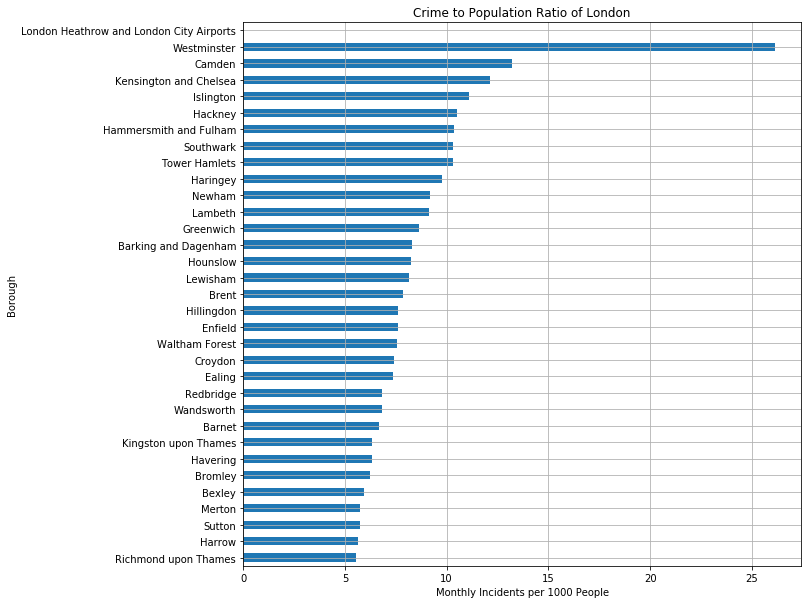

In [57]:
#Visualize crime per 1000 people
df.set_index('Borough')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

### Cluster Analysis
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [58]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 184 uniques categories.


In [59]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [60]:
# Add borough name back to dataframe
NewBorough = venues['Borough']
onehot.insert(0, 'Borough', NewBorough)
onehot.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('Borough').mean().reset_index()
grouped.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.037037,0.0,0.037037,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.020000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.026316,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [62]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['Borough']:
    print("----"+hood+"----")
    temp = grouped[grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Gym / Fitness Center  0.14
1     Martial Arts Dojo  0.14
2                  Pool  0.14
3           Bus Station  0.14
4           Supermarket  0.14


----Barnet----
                venue  freq
0                Café  0.50
1            Bus Stop  0.25
2    Business Service  0.25
3  African Restaurant  0.00
4             Rafting  0.00


----Bexley----
            venue  freq
0             Pub  0.11
1  Clothing Store  0.11
2     Coffee Shop  0.11
3        Pharmacy  0.07
4     Supermarket  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2  Sporting Goods Shop  0.06
3       Clothing Store  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.16
1           Coffee Shop  0.13
2          Burger Joint  0.05
3           Pizza Place  0.05
4  Gym / Fitness Center  0.05


----Camden----
            venue  freq
0     Coffee Sho

In [63]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Borough'] = grouped['Borough']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Gym / Fitness Center,Martial Arts Dojo,Park,Golf Course,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant
1,Barnet,Café,Bus Stop,Business Service,Yoga Studio,English Restaurant,Fish & Chips Shop,Film Studio,Field,Fast Food Restaurant,Farmers Market
2,Bexley,Clothing Store,Pub,Coffee Shop,Pharmacy,Supermarket,Fast Food Restaurant,Portuguese Restaurant,Sandwich Place,Furniture / Home Store,Chinese Restaurant
3,Brent,Coffee Shop,Hotel,Grocery Store,Sporting Goods Shop,Clothing Store,Bar,American Restaurant,Sandwich Place,Pizza Place,Burger Joint
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Furniture / Home Store,Chocolate Shop,Sushi Restaurant,Supermarket,Bookstore


In [64]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [65]:
kclusters = 5
london_cluster = grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_whole = df
london_whole = london_whole.join(venues_sorted.set_index('Borough'), on='Borough')

london_whole.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1616.166667,194352.0,51.5607,0.1557,8.315668,1.0,Pool,Bus Station,Supermarket,Gym / Fitness Center,Martial Arts Dojo,Park,Golf Course,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant
1,Barnet,2467.208333,369088.0,51.6252,-0.1517,6.684607,3.0,Café,Bus Stop,Business Service,Yoga Studio,English Restaurant,Fish & Chips Shop,Film Studio,Field,Fast Food Restaurant,Farmers Market
2,Bexley,1403.833333,236687.0,51.4549,0.1505,5.931181,1.0,Clothing Store,Pub,Coffee Shop,Pharmacy,Supermarket,Fast Food Restaurant,Portuguese Restaurant,Sandwich Place,Furniture / Home Store,Chinese Restaurant
3,Brent,2496.708333,317264.0,51.5588,-0.2817,7.869498,1.0,Coffee Shop,Hotel,Grocery Store,Sporting Goods Shop,Clothing Store,Bar,American Restaurant,Sandwich Place,Pizza Place,Burger Joint
4,Bromley,1983.833333,317899.0,51.4039,0.0198,6.240452,1.0,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Furniture / Home Store,Chocolate Shop,Sushi Restaurant,Supermarket,Bookstore


In [67]:
! pip install folium

In [68]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_whole['Latitude'], london_whole['Longitude'], london_whole['Borough'], london_whole['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.show()

NameError: name 'folium' is not defined

### Now let's observe each clusters and name them according to their characteristics

In [ ]:
# Cluster 0: Healthy area
london_whole.loc[london_whole['Cluster Labels'] == 0, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

In [ ]:
 # Cluster 1: Lively area (Hotels, Restaurants)
london_whole.loc[london_whole['Cluster Labels'] == 1, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

In [ ]:
# Cluster 2: Business area (Coffee shops,Markets,Business services)
london_whole.loc[london_whole['Cluster Labels'] == 2, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

In [ ]:
# Cluster 3:Busy/ lively area
london_whole.loc[london_whole['Cluster Labels'] == 3, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

In [ ]:
# Cluster 4: Traveller orTourist area
london_whole.loc[london_whole['Cluster Labels'] == 4, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]